In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('Customer_data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [14]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [15]:
df.dropna()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [16]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [17]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'Relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

In [18]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [19]:
df['Education'] = df['Education'].replace(['Graduation','Master','PhD'],1)
df['Education'] = df['Education'].replace(['2n Cycle','Basic'],0)

In [21]:
df['Children_count'] = df['Kidhome'] + df['Teenhome']

In [24]:
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

In [25]:
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [26]:
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [27]:
df['Customer_Age'] = (pd.Timestamp('now').year) - df['Year_Birth']

In [28]:
df['Customer_Age'].describe()

count    2240.000000
mean       54.194196
std        11.984069
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: Customer_Age, dtype: float64

In [30]:
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [31]:
df = df[df['Customer_Age'] < 90]
df = df[df['Income'] < 300000]

In [32]:
col_del = ["Year_Birth","ID","AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df=df.drop(columns=col_del,axis=1)

In [35]:
df=df.drop(columns='Dt_Customer',axis=1)

In [36]:
df

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Children_count,TotalAcceptedCmp,NumTotalPurchases,Expenses,Customer_Age
0,1,1,58138.0,58,7,0,3,11,1,0,0,25,1617,66
1,1,1,46344.0,38,5,0,3,11,0,2,0,6,27,69
2,1,0,71613.0,26,4,0,3,11,0,0,0,21,776,58
3,1,0,26646.0,26,6,0,3,11,0,1,0,8,53,39
4,1,0,58293.0,94,5,0,3,11,0,1,0,19,422,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1,0,61223.0,46,5,0,3,11,0,1,0,18,1341,56
2236,1,0,64014.0,56,7,0,3,11,0,3,1,22,444,77
2237,1,1,56981.0,91,6,0,3,11,0,0,1,19,1241,42
2238,1,0,69245.0,8,3,0,3,11,0,1,0,23,843,67


In [34]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])

In [38]:
scaler = preprocessing.StandardScaler()
col_scale = ['Income', 'Children_count', 'Expenses', 'TotalAcceptedCmp', 'NumTotalPurchases', 'Customer_Age']
df[col_scale] = scaler.fit_transform(df[col_scale])

In [39]:
df

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Children_count,TotalAcceptedCmp,NumTotalPurchases,Expenses,Customer_Age
0,1,1,0.287105,58,7,0,3,11,1,-1.264598,-0.439160,1.317945,1.676245,1.018352
1,1,1,-0.260882,38,5,0,3,11,0,1.404572,-0.439160,-1.159273,-0.963297,1.274785
2,1,0,0.913196,26,4,0,3,11,0,-1.264598,-0.439160,0.796425,0.280110,0.334530
3,1,0,-1.176114,26,6,0,3,11,0,0.069987,-0.439160,-0.898513,-0.920135,-1.289547
4,1,0,0.294307,94,5,0,3,11,0,0.069987,-0.439160,0.535666,-0.307562,-1.033114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1,0,0.430444,46,5,0,3,11,0,0.069987,-0.439160,0.405286,1.218061,0.163575
2236,1,0,0.560123,56,7,0,3,11,0,2.739158,1.032691,0.926805,-0.271040,1.958607
2237,1,1,0.233347,91,6,0,3,11,0,-1.264598,1.032691,0.535666,1.052052,-1.033114
2238,1,0,0.803172,8,3,0,3,11,0,0.069987,-0.439160,1.057185,0.391336,1.103830


In [40]:
df1 = df.copy()

C:\Users\Mohammad Junaid Alam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mohammad Junaid Alam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\Mohammad Junaid Alam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mohammad Junaid Alam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

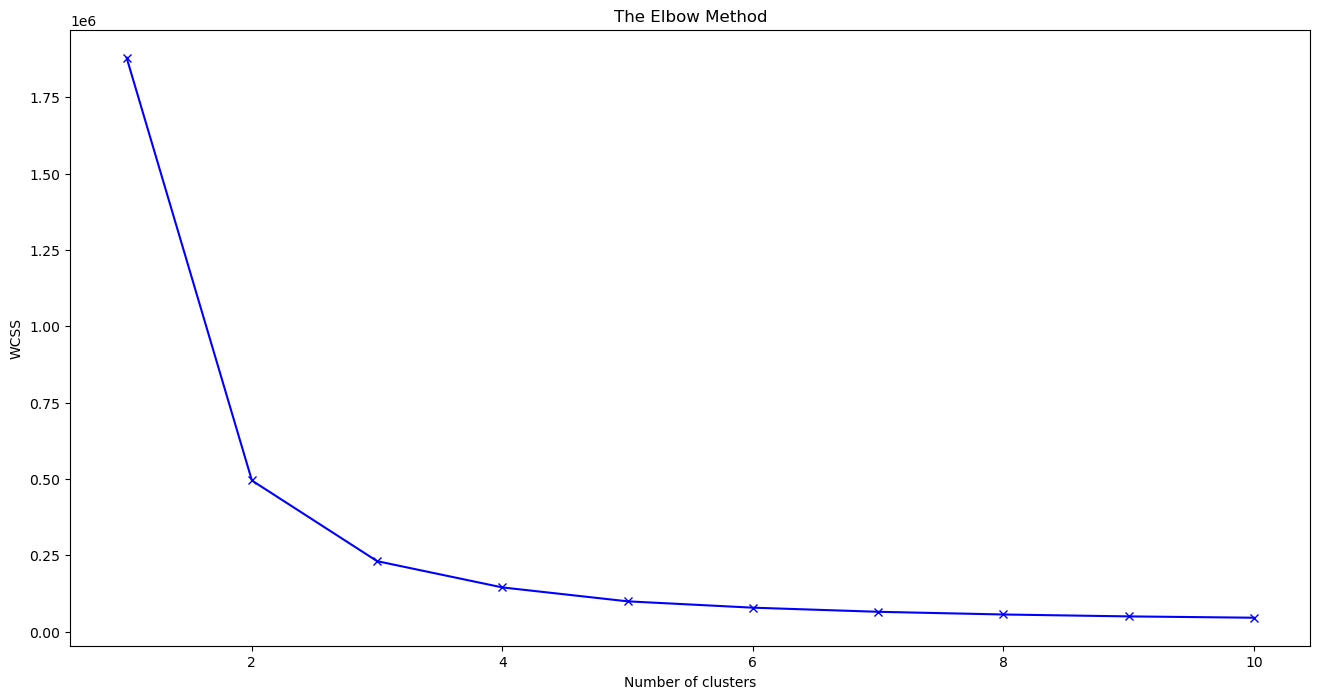

In [41]:
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [43]:
kmeans=KMeans(n_clusters=3, random_state=42).fit(df1)
pred=kmeans.predict(df1)
df1['cluster_Kmeans'] = pred + 1

C:\Users\Mohammad Junaid Alam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mohammad Junaid Alam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


<Axes: xlabel='cluster_Kmeans', ylabel='count'>

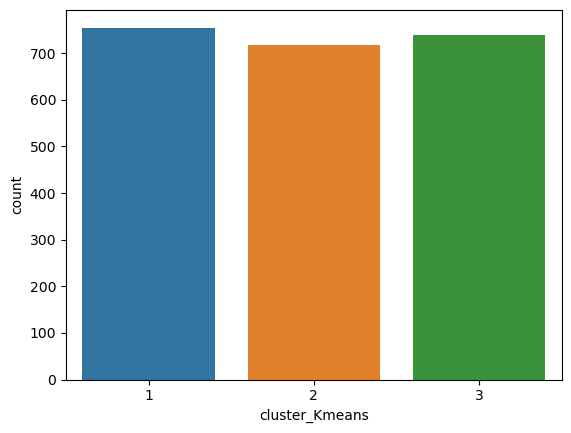

In [47]:
sns.countplot(x=df1["cluster_Kmeans"])